In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express  as xp
import seaborn as sns
import scipy as sc
import pandas as pd
import json

import datetime
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [2]:
data = pd.read_csv('Data_for_cross_selling_new.csv')

In [3]:
data

,Unnamed: 0,Customer_ID,ACCOUNT,Account_Name,Vision_SBU,Account_Status,ARR_DORMANCY_STATUS,Account_Type,CATEGORY_NAME,Account_Open_Date,Currency,Vision_GL,Vision_OUC,COMPANY_NAME,Account_Status_Date,Customer_Open_Date,Customer_Gender,Date_of_Birth,Age,Tenure,Marital_Status,MARITAL_STATUS,Public_Sector_Code,SECTOR,SECTOR_DESC,INDUSTRY,INDYSTRY_DESC,TARGET,TARGET_DESC,NATIONALITY,RESIDENCE,BIRTH_PROVINCE,Place_of_Birth,NET_MONTHLY_IN,Date_Last_Modified,Mobiserve_subscr,Date_Created_MS,Date_Created_IB,IB_subscr,Mobile_app_subscr,Date_Created_MA
0,0,1134993.0,1.000374e+11,HARINDINTWARI FABIO,RETL,0.0,Active,SBA,Special Savings Account,30-May-14,RWF,22131000.0,RW0010032,BUGARAMA BRANCH,12-Nov-21,30-May-2014,M,01-Jan-1971,51.0,8.0,1.0,MARRIED,O1,1000.0,sme,7.0,Wholesale and retail trade; repair,65.0,FARMERS,RW,RW,West,OL01014239,NaN,12-Nov-21,No,NaN,NaN,No,No,NaN
1,1,1017632.0,1.000361e+11,UWIMBABAZI MARIE LOUISE,RETL,0.0,Active,SBA,Student savings,18-Feb-09,RWF,22135000.0,RW0010002,KIGALI BRANCH,17-Oct-21,17-Feb-2009,F,09-May-1984,38.0,13.0,1.0,MARRIED,O1,1000.0,sme,20.0,Other service activities,73.0,SALARY EAR PRIV,RW,RW,West,OL01000657,NaN,17-Oct-21,Yes,2019-02-16,2020-10-20,Yes,Yes,2020-04-06
2,2,1124030.0,1.000371e+11,NZABAHIMANA JAFFET,RETL,0.0,Active,SBA,Cash Extra Savings,2-Dec-13,RWF,22134000.0,RW0010057,BUHANDA BRANCH,12-Nov-21,02-Dec-2013,M,01-Jan-1989,33.0,8.0,6.0,SINGLE,O1,1000.0,sme,7.0,Wholesale and retail trade; repair,63.0,MASS,RW,RW,South,OL01007005,NaN,12-Nov-21,Yes,2022-03-24,NaN,No,No,NaN
3,3,1129202.0,1.000372e+11,KIMARARUNGU ALEX,SAGRP,0.0,Active,SBA,Cash Extra Savings,7-Feb-14,RWF,22134000.0,RW0010004,REMERA BRANCH,12-Nov-21,07-Feb-2014,M,01-Jan-1991,31.0,8.0,6.0,SINGLE,O1,1000.0,sme,7.0,Wholesale and retail trade; repair,56.0,Ibimina,RW,RW,Kigali City,OL01001519,NaN,12-Nov-21,No,NaN,NaN,No,No,NaN
4,4,1142147.0,1.000377e+11,MPANO DEN DAVY,RETL,0.0,Active,SBA,Special Savings Account,26-Sep-14,RWF,22131000.0,RW0010010,KICUKIRO BRANCH,12-Nov-21,26-Sep-2014,M,14-Aug-2014,8.0,7.0,6.0,SINGLE,O1,1000.0,sme,7.0,Wholesale and retail trade; repair,62.0,STUDENTS,RW,RW,Kigali City,OL01002031,NaN,12-Nov-21,No,NaN,NaN,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563489,708984,1017559.0,1.000360e+11,AMAHIRWE JEAN CLAUDE,RETL,0.0,Active,SBA,Student savings,13-Feb-09,RWF,22135000.0,RW0010002,KIGALI BRANCH,12-Nov-21,13-Feb-2009,M,01-Jan-1986,36.0,13.0,1.0,SINGLE,O1,1000.0,sme,20.0,Other service activities,63.0,MASS,RW,RW,North,OL01000657,NaN,12-Nov-21,Yes,2014-12-16,NaN,No,No,NaN
563490,708985,1040265.0,1.000364e+11,UWERA ANCILLE,RETL,0.0,Active,SBA,Student savings,8-Apr-11,RWF,22135000.0,RW0010019,GICUMBI BRANCH,17-Oct-21,08-Apr-2011,F,01-Jan-1988,34.0,11.0,1.0,MARRIED,O1,1000.0,sme,7.0,Wholesale and retail trade; repair,73.0,SALARY EAR PRIV,RW,RW,North,OL01020957,NaN,17-Oct-21,Yes,2013-02-07,NaN,No,No,NaN
563491,708986,1136966.0,1.000375e+11,UWANYIRIGIRA CLAUDINE,RETL,0.0,Active,SBA,Student savings,24-Jun-14,RWF,22135000.0,RW0010041,AIRPORT BRANCH,17-Oct-21,24-Jun-2014,F,01-Jan-1981,41.0,8.0,1.0,MARRIED,O1,1000.0,sme,7.0,Wholesale and retail trade; repair,72.0,PROFESSIONALS,RW,RW,Kigali City,OL01002337,NaN,17-Oct-21,Yes,2016-03-02,NaN,No,No,NaN
563492,708987,1131891.0,1.000372e+11,KIMONYO FRANCOIS,RETL,0.0,Active,SBA,Special Savings Account,3-Mar-14,RWF,22131000.0,RW0010027,KIREHE BRANCH,12-Nov-21,03-Mar-2014,M,01-Feb-1935,87.0,8.0,1.0,MARRIED,O1,1000.0,sme,7.0,Wholesale and retail trade; repair,65.0,FARMERS,RW,RW,East,OL01026755,NaN,12-Nov-21,No,NaN,NaN,No,No,NaN


In [83]:
data['Account_Type'].value_counts()

CAA    348782
SBA    166337
LAA     47117
TDA      1258
Name: Account_Type, dtype: int64

In [86]:
round(348782/(348782+166337+ 47117+1258),2)

0.62

In [70]:
VisionSBU_map ={'MCEOTHR':'Micro Enterprises',
           'SMLOTHR':'Small Enterprises',
           'MEDOTHR':'Medium Enterprises',
           'LRGOTHR':'Large Enterprises',
           'RETL':'Retail/Individuals',
           'NGO':'NGOs, charity/welfare organisations',
           'SAGRP':'Business Groups/Community',
           'OTHER':'Others'}

In [64]:
data[(data['Customer_Gender']=='C')&(data['Vision_SBU']=='RETL')]

,Unnamed: 0,Customer_ID,ACCOUNT,Account_Name,Vision_SBU,Account_Status,ARR_DORMANCY_STATUS,Account_Type,CATEGORY_NAME,Account_Open_Date,Currency,Vision_GL,Vision_OUC,COMPANY_NAME,Account_Status_Date,Customer_Open_Date,Customer_Gender,Date_of_Birth,Age,Age_range,Tenure,Marital_Status,MARITAL_STATUS,Public_Sector_Code,SECTOR,SECTOR_DESC,INDUSTRY,INDYSTRY_DESC,TARGET,TARGET_DESC,NATIONALITY,RESIDENCE,BIRTH_PROVINCE,Place_of_Birth,NET_MONTHLY_IN,Date_Last_Modified,Mobiserve_subscr,Date_Created_MS,Date_Created_IB,IB_subscr,Mobile_app_subscr,Date_Created_MA
2342,3171,1122882.0,1.000370e+11,BK STAFF BUHANDA BRANCH ASSOC.,RETL,0.0,Active,SBA,Cash Extra Savings,23-Oct-13,RWF,22134000.0,RW0010057,BUHANDA BRANCH,12-Nov-21,23-Oct-2013,C,23-Oct-2013,8.0,NaN,8.0,NaN,NaN,O1,1000.0,sme,20.0,Other service activities,1.0,BK STAFF,RW,RW,NaN,OL01007005,NaN,12-Nov-21,No,NaN,NaN,No,No,NaN
3231,4326,1222853.0,1.000406e+11,ONE DIRECTION SAVING GROUP,RETL,0.0,Active,SBA,Special Savings Account,1-Feb-17,RWF,22131000.0,RW0010017,NYAGATARE BRANCH,12-Nov-21,01-Feb-2017,C,01-Feb-2017,5.0,NaN,5.0,NaN,NaN,O1,1000.0,sme,20.0,Other service activities,62.0,STUDENTS,RW,RW,NaN,OL01023937,NaN,12-Nov-21,No,NaN,NaN,No,No,NaN
6152,8228,1194829.0,1.000395e+11,GLORY PHARMACY,RETL,0.0,Active,SBA,Special Savings Account,24-Mar-16,RWF,22131000.0,RW0010029,RUHANGO BRANCH,12-Nov-21,24-Mar-2016,C,22-Oct-2015,6.0,NaN,6.0,NaN,NaN,O1,1000.0,sme,20.0,Other service activities,64.0,SOLE TRADERS,RW,RW,NaN,OL01007967,NaN,12-Nov-21,No,NaN,NaN,No,No,NaN
7175,9577,1241323.0,1.000411e+11,DR RUTAYISIRE ALPHONSE FOUNDATION,RETL,0.0,Active,SBA,Special Savings Account,6-Sep-17,RWF,22131000.0,RW0010003,KACYIRU BRANCH,12-Nov-21,06-Sep-2017,C,06-Sep-2017,4.0,NaN,4.0,NaN,NaN,O1,1000.0,sme,20.0,Other service activities,72.0,PROFESSIONALS,RW,RW,NaN,OL01001175,NaN,12-Nov-21,No,NaN,NaN,No,No,NaN
7916,10542,1125484.0,1.000083e+11,BENE KIMONYO TWITEZIMBERE,RETL,0.0,DOM.CLOSED,CAA,NGO Account,9-Dec-13,RWF,22111000.0,RW0010024,KIBUNGO BRANCH,12-Nov-21,09-Dec-2013,C,01-Jan-1900,122.0,>60,8.0,NaN,NaN,O1,1000.0,sme,20.0,Other service activities,63.0,MASS,RW,RW,NaN,OL01027831,NaN,12-Nov-21,No,NaN,NaN,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538602,679532,1221986.0,1.000471e+11,Emmanuel NSABIMANA,RETL,0.0,Active,SBA,BKQuick simple saving account,20-Aug-18,RWF,22135000.0,RW0010002,KIGALI BRANCH,12-Nov-21,13-Jan-2017,C,01-Jan-1900,122.0,>60,5.0,NaN,NaN,O1,1003.0,R&SME - Small Enterprises,11.0,Financial and insurance activities,64.0,SOLE TRADERS,RW,RW,NaN,OL01000657,NaN,12-Nov-21,No,NaN,NaN,No,No,NaN
538603,679533,1221986.0,1.000474e+11,Emmanuel NSABIMANA,RETL,0.0,Active,SBA,BKQuick simple saving account,20-Aug-18,RWF,22135000.0,RW0010002,KIGALI BRANCH,12-Nov-21,13-Jan-2017,C,01-Jan-1900,122.0,>60,5.0,NaN,NaN,O1,1003.0,R&SME - Small Enterprises,11.0,Financial and insurance activities,64.0,SOLE TRADERS,RW,RW,NaN,OL01000657,NaN,12-Nov-21,No,NaN,NaN,No,No,NaN
538604,679534,1221986.0,1.000551e+11,Emmanuel NSABIMANA,RETL,0.0,Active,SBA,BKQUICK LOAN,20-Aug-18,RWF,22135000.0,RW0010002,KIGALI BRANCH,12-Nov-21,13-Jan-2017,C,01-Jan-1900,122.0,>60,5.0,NaN,NaN,O1,1003.0,R&SME - Small Enterprises,11.0,Financial and insurance activities,64.0,SOLE TRADERS,RW,RW,NaN,OL01000657,NaN,12-Nov-21,No,NaN,NaN,No,No,NaN
552819,694800,1252498.0,1.000415e+11,RWANDA ANGLICAN STUDENTS ASSOCIATIO,RETL,0.0,Active,SBA,Student savings,30-Nov-17,RWF,22135000.0,RW0010017,NYAGATARE BRANCH,12-Nov-21,30-Nov-2017,C,30-Nov-2017,4.0,NaN,4.0,NaN,NaN,O1,1000.0,sme,20.0,Other service activities,62.0,STUDENTS,RW,RW,NaN,OL01023937,NaN,12-Nov-21,No,NaN,NaN,No,No,NaN


In [69]:
print('Total number of accounts:',data['ACCOUNT'].nunique())

Total number of accounts: 563493


In [65]:
data[(data['Customer_Gender']!='C')&(data['Vision_SBU']!='RETL')]

,Unnamed: 0,Customer_ID,ACCOUNT,Account_Name,Vision_SBU,Account_Status,ARR_DORMANCY_STATUS,Account_Type,CATEGORY_NAME,Account_Open_Date,Currency,Vision_GL,Vision_OUC,COMPANY_NAME,Account_Status_Date,Customer_Open_Date,Customer_Gender,Date_of_Birth,Age,Age_range,Tenure,Marital_Status,MARITAL_STATUS,Public_Sector_Code,SECTOR,SECTOR_DESC,INDUSTRY,INDYSTRY_DESC,TARGET,TARGET_DESC,NATIONALITY,RESIDENCE,BIRTH_PROVINCE,Place_of_Birth,NET_MONTHLY_IN,Date_Last_Modified,Mobiserve_subscr,Date_Created_MS,Date_Created_IB,IB_subscr,Mobile_app_subscr,Date_Created_MA
3,3,1129202.0,1.000372e+11,KIMARARUNGU ALEX,SAGRP,0.0,Active,SBA,Cash Extra Savings,7-Feb-14,RWF,22134000.0,RW0010004,REMERA BRANCH,12-Nov-21,07-Feb-2014,M,01-Jan-1991,31.0,30-34,8.0,6.0,SINGLE,O1,1000.0,sme,7.0,Wholesale and retail trade; repair,56.0,Ibimina,RW,RW,Kigali City,OL01001519,NaN,12-Nov-21,No,NaN,NaN,No,No,NaN
7,8,1126328.0,1.000384e+11,KARANGWA MARTIN,MEDOTHR,0.0,Active,SBA,Student savings,8-May-15,RWF,22135000.0,RW0010002,KIGALI BRANCH,17-Oct-21,21-Jan-2014,M,01-Jan-1987,35.0,35-39,8.0,6.0,SINGLE,O1,1002.0,R&SME - Micro Entreprises,7.0,Wholesale and retail trade; repair,55.0,Micro SME,RW,RW,West,OL01000657,NaN,17-Oct-21,Yes,2019-11-29,NaN,No,No,NaN
48,63,1179817.0,1.000390e+11,MUTESA THEONESTE,LRGOTHR,0.0,Active,SBA,Student savings,2-Oct-15,RWF,22135000.0,RW0010055,MUSANZE TOWN BRANCH,12-Nov-21,02-Oct-2015,M,10-Oct-1987,34.0,30-34,6.0,6.0,SINGLE,O1,1003.0,R&SME - Small Enterprises,17.0,Education,6.0,Small SME,RW,RW,East,OL01019217,NaN,12-Nov-21,No,NaN,NaN,No,No,NaN
67,85,1135646.0,1.000374e+11,HABYARIMANA JOSEPH,SAGRP,0.0,Active,SBA,Cash Extra Savings,12-May-14,RWF,22134000.0,RW0010004,REMERA BRANCH,17-Oct-21,12-May-2014,M,01-Jan-1990,32.0,30-34,8.0,6.0,SINGLE,O1,1000.0,sme,7.0,Wholesale and retail trade; repair,56.0,Ibimina,RW,RW,South,OL01001519,NaN,17-Oct-21,Yes,2022-07-13,NaN,No,Yes,2021-08-25
98,122,1129216.0,1.000372e+11,NAYIGIZIKI CLAUDE,SAGRP,0.0,Active,SBA,Cash Extra Savings,7-Feb-14,RWF,22134000.0,RW0010004,REMERA BRANCH,12-Nov-21,07-Feb-2014,M,01-Jan-1986,36.0,35-39,8.0,6.0,SINGLE,O1,1000.0,sme,7.0,Wholesale and retail trade; repair,56.0,Ibimina,RW,RW,East,OL01001519,NaN,12-Nov-21,Yes,2022-03-24,NaN,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563334,708725,1116656.0,1.000369e+11,MURENGEZI JEAN MARIE VIANNEY,SAGRP,0.0,Active,SBA,Student savings,19-Jul-13,RWF,22135000.0,RW0010002,KIGALI BRANCH,17-Oct-21,19-Jul-2013,M,01-Jan-1984,38.0,35-39,9.0,6.0,SINGLE,O1,1000.0,sme,7.0,Wholesale and retail trade; repair,56.0,Ibimina,RW,RW,South,OL01000657,NaN,17-Oct-21,Yes,2018-07-27,NaN,No,No,NaN
563365,708787,1096823.0,1.000369e+11,NTIRANDEKURA JUSTIN,SAGRP,0.0,Active,SBA,Special Savings Account,14-Jun-13,RWF,22131000.0,RW0010045,GIPOROSO BRANCH,12-Nov-21,22-Nov-2012,M,01-Jan-1981,41.0,40-44,9.0,1.0,MARRIED,O1,1000.0,sme,7.0,Wholesale and retail trade; repair,56.0,Ibimina,RW,RW,Kigali City,OL01001229,NaN,12-Nov-21,No,NaN,NaN,No,No,NaN
563366,708788,1096823.0,1.000530e+11,NTIRANDEKURA JUSTIN,SAGRP,0.0,DOM.CLOSED,SBA,Write off acct,14-Jun-13,RWF,22131000.0,RW0010045,KIMIRONKO BRANCH,12-Nov-21,22-Nov-2012,M,01-Jan-1981,41.0,40-44,9.0,1.0,MARRIED,O1,1000.0,sme,7.0,Wholesale and retail trade; repair,56.0,Ibimina,RW,RW,Kigali City,OL01001229,NaN,12-Nov-21,No,NaN,NaN,No,No,NaN
563367,708789,1096823.0,1.000620e+11,NTIRANDEKURA JUSTIN,SAGRP,0.0,Active,SBA,Write off acct,14-Jun-13,RWF,22131000.0,RW0010045,KIMIRONKO BRANCH,12-Nov-21,22-Nov-2012,M,01-Jan-1981,41.0,40-44,9.0,1.0,MARRIED,O1,1000.0,sme,7.0,Wholesale and retail trade; repair,56.0,Ibimina,RW,RW,Kigali City,OL01001229,NaN,12-Nov-21,No,NaN,NaN,No,No,NaN


In [87]:
data[data['Vision_SBU']=='RETL']['Customer_ID'].nunique()

397037

In [88]:
397037/432806

0.9173555819466458

In [45]:
print('The number of all customers',data['Customer_ID'].nunique())

The number of all customers 432806


In [48]:
# data['BIRTH_PROVINCE'].value_counts().plot(kind='barh')
# plt.title('Customer location')
# plt.show()

print('The proportion of digital channel users',round(363648/432806, 2))


The proportion of digital channel users 0.84


# Digital Channels

IB users: IB_subscr
No     385015
Yes     47791
Name: Customer_ID, dtype: int64


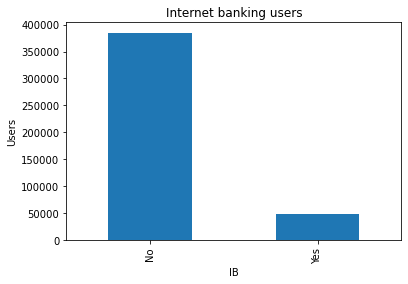

In [5]:
print('IB users:',data.groupby('IB_subscr')['Customer_ID'].nunique())
data.groupby('IB_subscr')['Customer_ID'].nunique().plot(kind='bar')
plt.title('Internet banking users')
plt.xlabel('IB')
plt.ylabel('Users')
plt.show()

Mobiserve users: Mobiserve_subscr
No     171214
Yes    261592
Name: Customer_ID, dtype: int64


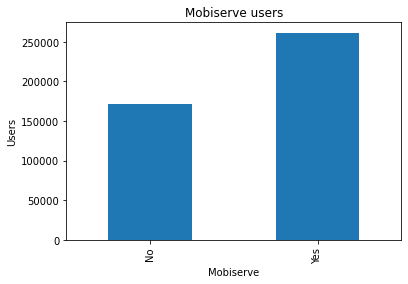

In [6]:
print('Mobiserve users:',data.groupby('Mobiserve_subscr')['Customer_ID'].nunique())
data.groupby('Mobiserve_subscr')['Customer_ID'].nunique().plot(kind='bar')
plt.title('Mobiserve users')
plt.xlabel('Mobiserve')
plt.ylabel('Users')
plt.show()

App users: Mobile_app_subscr
No     328834
Yes    103972
Name: Customer_ID, dtype: int64


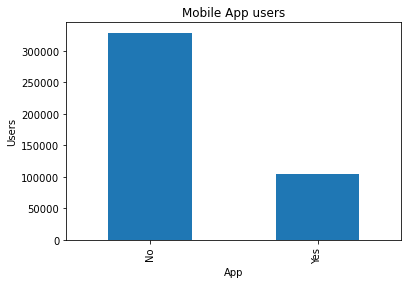

In [7]:
print('App users:',data.groupby('Mobile_app_subscr')['Customer_ID'].nunique())
data.groupby('Mobile_app_subscr')['Customer_ID'].nunique().plot(kind='bar')
plt.title('Mobile App users')
plt.xlabel('App')
plt.ylabel('Users')
plt.show()

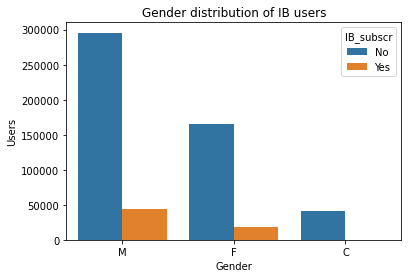

In [8]:
sns.countplot(x ='Customer_Gender', hue = "IB_subscr", data = data)
plt.title('Gender distribution of IB users')
plt.xlabel('Gender')
plt.ylabel('Users')
plt.show()

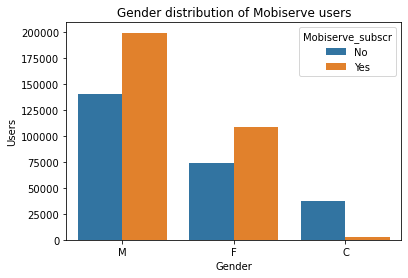

In [9]:
sns.countplot(x ='Customer_Gender', hue = "Mobiserve_subscr", data = data)
plt.title('Gender distribution of Mobiserve users')
plt.xlabel('Gender')
plt.ylabel('Users')
plt.show()

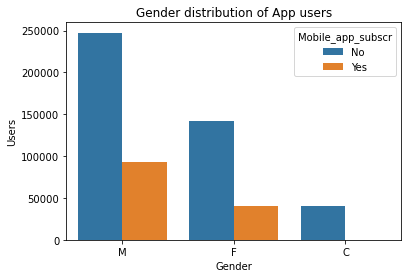

In [10]:
sns.countplot(x ='Customer_Gender', hue = "Mobile_app_subscr", data = data)
plt.title('Gender distribution of App users')
plt.xlabel('Gender')
plt.ylabel('Users')
plt.show()

In [13]:
# sns.countplot(x ='Customer_Gender', hue = "Mobile_app_subscr", data = App)
# plt.title('Gender distribution of App users')
# plt.xlabel('Gender')
# plt.ylabel('Users')
# plt.show()

In [14]:
# plt.figure(figsize=(12,8))
# sns.countplot(x ='Age', hue = "IB_subscr", data = data)
# plt.title('Age distribution of IB users')
# plt.xlabel('Age')
# plt.ylabel('Users')
# plt.show()


In [16]:
# data[data['Age_range']<18]

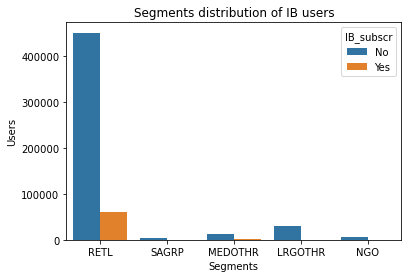

In [17]:
sns.countplot(x ='Vision_SBU', hue = "IB_subscr", data = data)
plt.title('Segments distribution of IB users')
plt.xlabel('Segments')
plt.ylabel('Users')
plt.show()

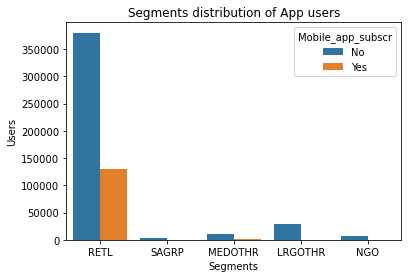

In [18]:
sns.countplot(x ='Vision_SBU', hue = "Mobile_app_subscr", data = data)
plt.title('Segments distribution of App users')
plt.xlabel('Segments')
plt.ylabel('Users')
plt.show()

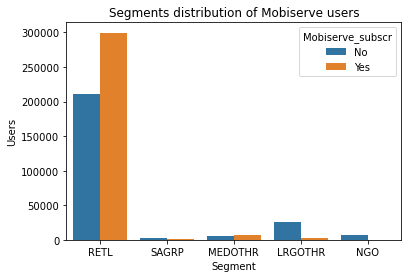

In [19]:
sns.countplot(x ='Vision_SBU', hue = "Mobiserve_subscr", data = data)
plt.title('Segments distribution of Mobiserve users')
plt.xlabel('Segment')
plt.ylabel('Users')
plt.show()

In [20]:
###############################################Customers who use all channels################################
Users_for_channels = data[(data['Mobiserve_subscr']=='Yes')&(data['IB_subscr']=='Yes')&(data['Mobile_app_subscr']=='Yes')]

In [76]:
Users_for_channels['Vision_SBU'].value_counts()

RETL       49556
MEDOTHR     1000
SAGRP        187
LRGOTHR       70
NGO            1
Name: Vision_SBU, dtype: int64

In [21]:
print('Customers who use all digital channels:', Users_for_channels['Customer_ID'].nunique())

Customers who use all digital channels: 40421


In [22]:
###############################################Customers who use all channels################################
IB_mobs = data[(data['Mobiserve_subscr']=='Yes')&(data['IB_subscr']=='Yes')&(data['Mobile_app_subscr']=='No')]
print('Customers who use IB and Mobiserve:', IB_mobs['Customer_ID'].nunique())

Customers who use IB and Mobiserve: 566


In [77]:
IB_mobs['Vision_SBU'].value_counts()

RETL       737
MEDOTHR      8
SAGRP        2
Name: Vision_SBU, dtype: int64

In [23]:
###############################################Customers who use all channels################################
IB_app = data[(data['Mobiserve_subscr']=='No')&(data['IB_subscr']=='Yes')&(data['Mobile_app_subscr']=='Yes')]
print('Customers who use IB and Mobile app:', IB_app['Customer_ID'].nunique())

Customers who use IB and Mobile app: 5777


In [78]:
IB_app['Vision_SBU'].value_counts()

RETL       8086
MEDOTHR      53
LRGOTHR      20
SAGRP         6
Name: Vision_SBU, dtype: int64

In [24]:
###############################################Customers who use all channels################################
Mobs_app = data[(data['Mobiserve_subscr']=='Yes')&(data['IB_subscr']=='No')&(data['Mobile_app_subscr']=='Yes')]
print('Customers who use App and Mobiserve:', Mobs_app['Customer_ID'].nunique())

Customers who use App and Mobiserve: 46060


In [79]:
Mobs_app['Vision_SBU'].value_counts()

RETL       56869
MEDOTHR     1110
SAGRP        174
LRGOTHR      167
NGO            2
Name: Vision_SBU, dtype: int64

In [43]:
Mobs_app.shape

(58323, 41)

In [25]:
IB = data[(data['Mobiserve_subscr']=='No')&(data['IB_subscr']=='Yes')&(data['Mobile_app_subscr']=='No')]
print('Customers who use IB only:', IB['Customer_ID'].nunique())

Customers who use IB only: 1027


In [80]:
IB['Vision_SBU'].value_counts()

RETL       2200
MEDOTHR      46
LRGOTHR       6
SAGRP         2
Name: Vision_SBU, dtype: int64

In [26]:
Mobs = data[(data['Mobiserve_subscr']=='Yes')&(data['IB_subscr']=='No')&(data['Mobile_app_subscr']=='No')]
print('Customers who use Mobiserve only:', Mobs['Customer_ID'].nunique())

Customers who use Mobiserve only: 174545


In [81]:
Mobs['Vision_SBU'].value_counts()

RETL       192497
MEDOTHR      5422
LRGOTHR      2795
SAGRP        1097
NGO           111
Name: Vision_SBU, dtype: int64

In [27]:
App = data[(data['Mobiserve_subscr']=='No')&(data['IB_subscr']=='No')&(data['Mobile_app_subscr']=='Yes')]
print('Customers who use App only:', App['Customer_ID'].nunique())

Customers who use App only: 11714


In [82]:
App['Vision_SBU'].value_counts()

RETL       16085
LRGOTHR      130
MEDOTHR       99
SAGRP         13
Name: Vision_SBU, dtype: int64

In [28]:
App[App['Customer_Gender']!='C']

,Unnamed: 0,Customer_ID,ACCOUNT,Account_Name,Vision_SBU,Account_Status,ARR_DORMANCY_STATUS,Account_Type,CATEGORY_NAME,Account_Open_Date,Currency,Vision_GL,Vision_OUC,COMPANY_NAME,Account_Status_Date,Customer_Open_Date,Customer_Gender,Date_of_Birth,Age,Tenure,Marital_Status,MARITAL_STATUS,Public_Sector_Code,SECTOR,SECTOR_DESC,INDUSTRY,INDYSTRY_DESC,TARGET,TARGET_DESC,NATIONALITY,RESIDENCE,BIRTH_PROVINCE,Place_of_Birth,NET_MONTHLY_IN,Date_Last_Modified,Mobiserve_subscr,Date_Created_MS,Date_Created_IB,IB_subscr,Mobile_app_subscr,Date_Created_MA
54,69,1137923.0,1.000375e+11,ATWINE PAUL,RETL,0.0,Active,SBA,Special Savings Account,23-Jun-14,RWF,22131000.0,RW0010060,KIZIGURO BRANCH,17-Oct-21,23-Jun-2014,M,12-Feb-1986,36.0,8.0,6.0,SINGLE,O1,1000.0,sme,7.0,Wholesale and retail trade; repair,73.0,SALARY EAR PRIV,RW,RW,EAST PROVINCE,OL01024817,NaN,17-Oct-21,No,NaN,NaN,No,Yes,2021-07-20
61,76,1017724.0,1.000360e+11,SEBUHURA GIHOZO PATRICK,RETL,0.0,Active,SBA,Student savings,13-Feb-09,RWF,22135000.0,RW0010002,KIGALI BRANCH,12-Nov-21,13-Feb-2009,M,07-Apr-1984,38.0,13.0,1.0,SINGLE,O1,1000.0,sme,20.0,Other service activities,63.0,MASS,RW,RW,RDC,OL01000657,NaN,12-Nov-21,No,NaN,NaN,No,Yes,2018-09-19
289,405,1247078.0,1.000413e+11,AL BARWANI JAMILA HAMOOD SALIM,RETL,0.0,Active,SBA,Special Savings Account,13-Oct-17,RWF,22131000.0,RW0010012,RUBAVU BRANCH,12-Nov-21,13-Oct-2017,F,30-May-1961,61.0,4.0,6.0,SINGLE,O1,1000.0,sme,7.0,Wholesale and retail trade; repair,73.0,SALARY EAR PRIV,RW,RW,601080103,OL01011773,NaN,12-Nov-21,No,NaN,NaN,No,Yes,2021-09-17
297,413,1037217.0,1.000363e+11,IKUZWE ODRIE MAGNIFICAT,RETL,0.0,Active,SBA,Student savings,25-Jan-11,RWF,22135000.0,RW0010013,RUSIZI BRANCH,17-Oct-21,25-Jan-2011,M,06-Dec-2010,11.0,11.0,6.0,SINGLE,O1,1000.0,sme,7.0,Wholesale and retail trade; repair,60.0,KIDS,RW,RW,West,OL01014807,NaN,17-Oct-21,No,NaN,NaN,No,Yes,2021-01-07
386,557,1236609.0,1.000409e+11,SADESH KUMAR PUTHENPURAYIL SOMAN,RETL,0.0,Active,SBA,Special Savings Account,10-Jul-17,RWF,22131000.0,RW0010003,KACYIRU BRANCH,12-Nov-21,10-Jul-2017,M,23-Mar-1988,34.0,5.0,1.0,MARRIED,O1,1000.0,sme,7.0,Wholesale and retail trade; repair,73.0,SALARY EAR PRIV,IN,RW,NaN,OL01001175,NaN,12-Nov-21,No,NaN,NaN,No,Yes,2018-11-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563376,708798,1083045.0,1.000178e+11,MUTAVU SHEILA MUTIMBO,RETL,0.0,Active,SBA,Individual Current account,6-Aug-12,RWF,22131000.0,RW0010045,INSURANCE PLAZA BRANCH,17-Oct-21,06-Aug-2012,F,20-Oct-1984,37.0,10.0,6.0,SINGLE,O1,1000.0,sme,20.0,Other service activities,73.0,SALARY EAR PRIV,RW,RW,Nord,OL01001547,NaN,17-Oct-21,No,NaN,NaN,No,Yes,2018-11-06
563377,708799,1083045.0,1.000366e+11,MUTAVU SHEILA MUTIMBO,RETL,0.0,Active,SBA,Special Savings Account,6-Aug-12,RWF,22131000.0,RW0010045,GIPOROSO BRANCH,17-Oct-21,06-Aug-2012,F,20-Oct-1984,37.0,10.0,6.0,SINGLE,O1,1000.0,sme,20.0,Other service activities,73.0,SALARY EAR PRIV,RW,RW,Nord,OL01001547,NaN,17-Oct-21,No,NaN,NaN,No,Yes,2018-11-06
563378,708800,1083045.0,1.000371e+11,MUTAVU SHEILA MUTIMBO,RETL,0.0,Active,SBA,Special Savings Account,6-Aug-12,RWF,22131000.0,RW0010045,INSURANCE PLAZA BRANCH,17-Oct-21,06-Aug-2012,F,20-Oct-1984,37.0,10.0,6.0,SINGLE,O1,1000.0,sme,20.0,Other service activities,73.0,SALARY EAR PRIV,RW,RW,Nord,OL01001547,NaN,17-Oct-21,No,NaN,NaN,No,Yes,2018-11-06
563466,708960,1192620.0,1.000006e+11,HAKIZAYEZU PIERRE DAMIEN,RETL,0.0,Active,SBA,Individual Current account,11-Dec-17,RWF,22134000.0,RW0010009,MUSANZE TOWN BRANCH,17-Oct-21,01-Jan-1998,M,28-Jan-1968,54.0,24.0,1.0,MARRIED,O1,1000.0,sme,17.0,Education,73.0,SALARY EAR PRIV,RW,RW,North,OL01019217,NaN,17-Oct-21,No,NaN,NaN,No,Yes,2021-04-14


In [29]:
# App.groupby('Age')['Customer_ID'].nunique()

In [30]:
# data.insert(19,'Age_range',)

In [31]:
data[(data['Customer_Gender']!='C')&(data['Age']==0)]

,Unnamed: 0,Customer_ID,ACCOUNT,Account_Name,Vision_SBU,Account_Status,ARR_DORMANCY_STATUS,Account_Type,CATEGORY_NAME,Account_Open_Date,Currency,Vision_GL,Vision_OUC,COMPANY_NAME,Account_Status_Date,Customer_Open_Date,Customer_Gender,Date_of_Birth,Age,Tenure,Marital_Status,MARITAL_STATUS,Public_Sector_Code,SECTOR,SECTOR_DESC,INDUSTRY,INDYSTRY_DESC,TARGET,TARGET_DESC,NATIONALITY,RESIDENCE,BIRTH_PROVINCE,Place_of_Birth,NET_MONTHLY_IN,Date_Last_Modified,Mobiserve_subscr,Date_Created_MS,Date_Created_IB,IB_subscr,Mobile_app_subscr,Date_Created_MA
471737,602218,1451757.0,1.000505e+11,AKARIZA ALIANCE,RETL,0.0,Active,SBA,Student savings,12-Oct-21,RWF,22135000.0,RW0010054,NGARAMA BRANCH,17-Oct-21,12-Oct-2021,F,11-Oct-2021,0.0,0.0,6.0,SINGLE,O1,1000.0,sme,7.0,Wholesale and retail trade; repair,62.0,STUDENTS,RW,RW,Iburasirazuba,OL01025091,NaN,17-Oct-21,Yes,2021-10-15,NaN,No,No,NaN


In [32]:
# range(data['Age'].min(), data['Age'].max())


In [33]:
data.insert(19,'Age_range', data['Age'])

In [34]:
data['Age_range']=data['Age_range'].astype(str).str.split('.', expand=True, n=1)[0]

In [35]:
# data['Age_range'] =pd.to_numeric(data['Age_range'], errors='coerce').fillna(9999).astype(int)

In [36]:
bins=[18, 25, 30, 35, 40, 45, 50, 55, 60, np.inf]
Labels = ["18-24","25-29","30-34","35-39","40-44","45-49","50-54","55-60",">60"]
data['Age_range'] = pd.cut(data['Age'], bins, include_lowest=True, right = False, labels=Labels)

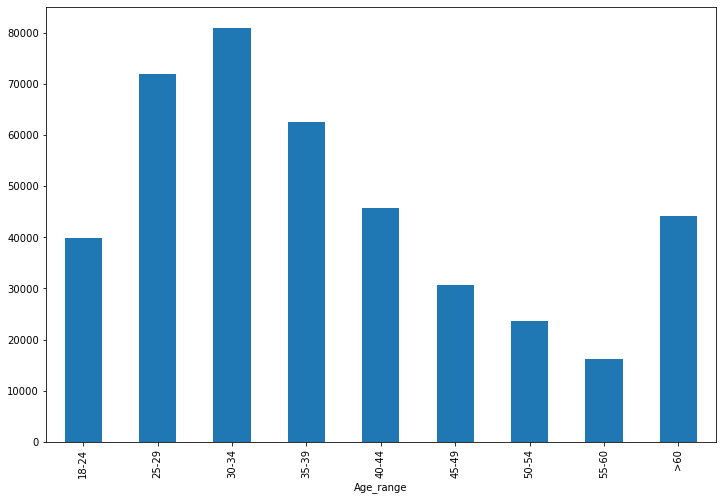

In [37]:
plt.figure(figsize=(12,8))
data.groupby('Age_range')['Customer_ID'].nunique().plot(kind='bar')
plt.show()

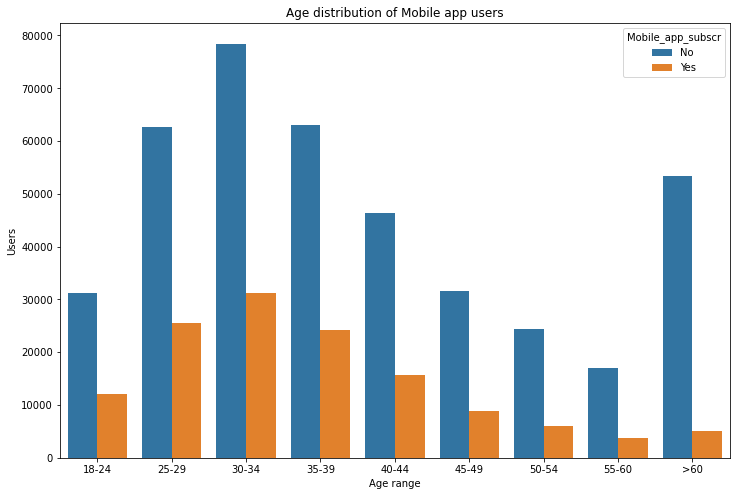

In [38]:
plt.figure(figsize=(12,8))
sns.countplot(x ='Age_range', hue = "Mobile_app_subscr", data = data)
plt.title('Age distribution of Mobile app users')
plt.xlabel('Age range')
plt.ylabel('Users')
plt.show()

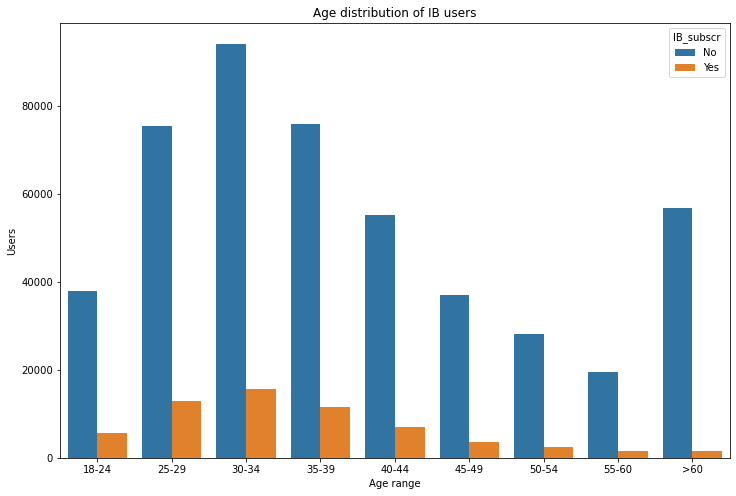

In [39]:
plt.figure(figsize=(12,8))
sns.countplot(x ='Age_range', hue = "IB_subscr", data = data)
plt.title('Age distribution of IB users')
plt.xlabel('Age range')
plt.ylabel('Users')
plt.show()

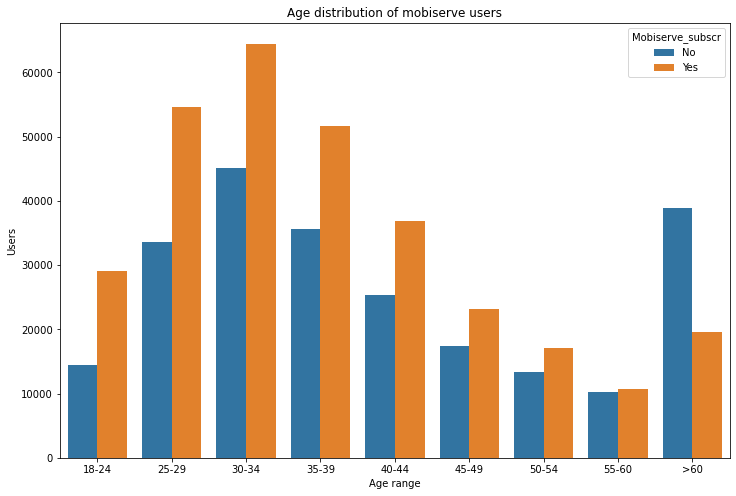

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(x ='Age_range', hue = "Mobiserve_subscr", data = data)
plt.title('Age distribution of mobiserve users')
plt.xlabel('Age range')
plt.ylabel('Users')
plt.show()

In [72]:
data.columns

Index(['Unnamed: 0', 'Customer_ID', 'ACCOUNT', 'Account_Name', 'Vision_SBU',
       'Account_Status', 'ARR_DORMANCY_STATUS', 'Account_Type',
       'CATEGORY_NAME', 'Account_Open_Date', 'Currency', 'Vision_GL',
       'Vision_OUC', 'COMPANY_NAME', 'Account_Status_Date',
       'Customer_Open_Date', 'Customer_Gender', 'Date_of_Birth', 'Age',
       'Age_range', 'Tenure', 'Marital_Status', 'MARITAL_STATUS',
       'Public_Sector_Code', 'SECTOR', 'SECTOR_DESC', 'INDUSTRY',
       'INDYSTRY_DESC', 'TARGET', 'TARGET_DESC', 'NATIONALITY', 'RESIDENCE',
       'BIRTH_PROVINCE', 'Place_of_Birth', 'NET_MONTHLY_IN',
       'Date_Last_Modified', 'Mobiserve_subscr', 'Date_Created_MS',
       'Date_Created_IB', 'IB_subscr', 'Mobile_app_subscr', 'Date_Created_MA'],
      dtype='object')

In [73]:
data = data[['Customer_ID', 'ACCOUNT', 'Account_Name', 'Vision_SBU',
       'Account_Status', 'ARR_DORMANCY_STATUS', 'Account_Type',
       'CATEGORY_NAME', 'Account_Open_Date', 'Currency', 'Vision_GL',
       'Vision_OUC', 'COMPANY_NAME', 'Account_Status_Date',
       'Customer_Open_Date', 'Customer_Gender', 'Date_of_Birth', 'Age',
       'Age_range', 'Tenure', 'Marital_Status', 'MARITAL_STATUS',
       'Public_Sector_Code', 'SECTOR', 'SECTOR_DESC', 'INDUSTRY',
       'INDYSTRY_DESC', 'TARGET', 'TARGET_DESC', 'NATIONALITY', 'RESIDENCE',
       'BIRTH_PROVINCE', 'Place_of_Birth', 'NET_MONTHLY_IN',
       'Date_Last_Modified', 'Mobiserve_subscr', 'Date_Created_MS',
       'Date_Created_IB', 'IB_subscr', 'Mobile_app_subscr', 'Date_Created_MA']]

In [74]:
# data.to_csv('Crosselling_data.csv')